# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [24]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\SwabhavDrive\Deep Learning\ai-env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

ValueError: Input 0 of layer "lstm_4" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0046
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0048
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0041
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0039
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0036
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0038
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0036
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0037
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0039
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0037
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0038
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0031
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0034
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0031
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


### Visualising the results

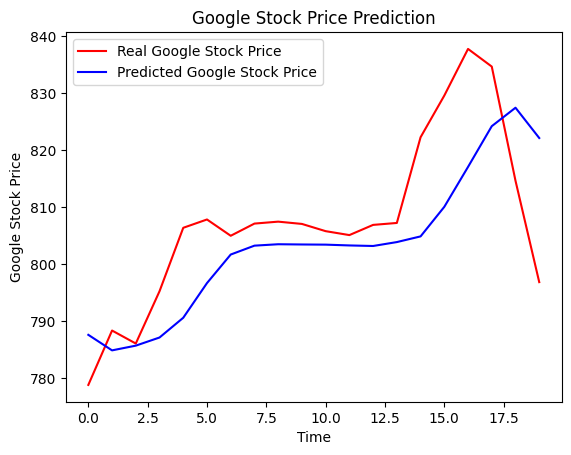

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()